<a href="https://colab.research.google.com/github/saranyaguhanathan/community/blob/main/Assignment_6_Brain_Vs_Body_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

# 1. Find the linear regression equation for this data for brain weight to body weight.
# 2. Chart the original data and the equation on the chart.
# 3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
# equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_fwf("brain_body.txt")
df.head(10)

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
5,27.660,115.0
6,14.830,98.2
7,1.040,5.5
8,4.190,58.0
9,0.425,6.4


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [ ]:
df.shape

(62, 2)

In [ ]:
df.drop_duplicates()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df.shape

(62, 2)

In [ ]:
# IQR 
iqr=df['Body'].quantile(0.75)-df['Body'].quantile(0.25)
upper_thershold=df['Body'].quantile(0.75)+(1.5*iqr)
lower_thershold=df['Body'].quantile(0.25)-(1.5*iqr)
upper_thershold,lower_thershold

(408.625, -238.375)

In [ ]:
# to remove outliers we are cliping the data
df.Body=df.Body.clip(-238.375,408.625)

In [ ]:
# IQR 
iqr=df['Brain'].quantile(0.75)-df['Brain'].quantile(0.25)
upper_thershold=df['Brain'].quantile(0.75)+(1.5*iqr)
lower_thershold=df['Brain'].quantile(0.25)-(1.5*iqr)
upper_thershold,lower_thershold

(119.60625, -70.80375000000001)

In [ ]:
df.Brain=df.Brain.clip(-70.80,119.60)

In [ ]:
df.head(10)

,Brain,Body
0,3.385,44.500
1,0.480,15.500
2,1.350,8.100
3,119.600,408.625
4,36.330,119.500
5,27.660,115.000
6,14.830,98.200
7,1.040,5.500
8,4.190,58.000
9,0.425,6.400


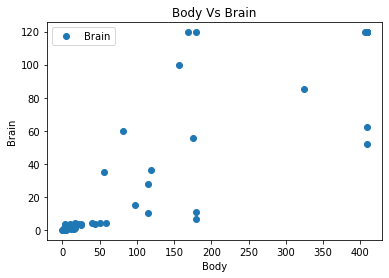

In [ ]:
# EDA
df.plot(x='Body',y='Brain',style='o')
plt.title("Body Vs Brain")
plt.xlabel("Body")
plt.ylabel("Brain")
plt.show()


In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.888241
Body,0.888241,1.000000


In [ ]:
# from above plot, not clear to conclude that there is linear relationshio between feature and target,
# but correlation >+0.2 so there is positive linear relationship is confirmed.
# so, we try transformation 
df['log_body']=np.log(df['Body'])

In [ ]:
df.head(10)

,Actual,Predicted
0,3.385,13.454263
1,3.000,7.943179
2,6.800,51.466610
3,35.000,16.704389
4,4.190,17.269629
5,0.480,5.258292
6,0.048,0.970951
7,1.700,2.658191
8,0.101,2.008166
9,3.600,6.812700


In [ ]:
df['log_brain']=np.log(df['Brain'])

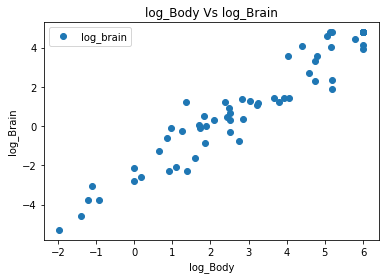

,log_body,log_brain
log_body,1.000000,0.960111
log_brain,0.960111,1.000000


In [ ]:
# plot after transforming data
df.plot(x='log_body',y='log_brain',style='o')
plt.title("log_Body Vs log_Brain")
plt.xlabel("log_Body")
plt.ylabel("log_Brain")
plt.show()
df[['log_body','log_brain']].corr()

In [ ]:
# Modelling
X = df.loc[:,['Body']].values #array of features
y = df.loc[:,'Brain'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [ ]:
X_train_scaled

array([[-0.67985388],
       [ 1.9688779 ],
       [-0.65951057],
       [-0.57485615],
       [-0.70610331],
       [-0.70019719],
       [ 1.9688779 ],
       [-0.67132281],
       [-0.63194866],
       [ 0.46199643],
       [-0.71004072],
       [-0.69625977],
       [ 1.9688779 ],
       [-0.63326113],
       [-0.63785478],
       [ 0.31762455],
       [-0.70479084],
       [-0.60110558],
       [-0.71069696],
       [-0.68707247],
       [-0.68641623],
       [-0.3320489 ],
       [ 1.9688779 ],
       [ 0.04200551],
       [-0.71102508],
       [ 1.4201007 ],
       [-0.5446693 ],
       [ 0.43574699],
       [-0.0682421 ],
       [-0.61094912],
       [ 1.9688779 ],
       [-0.69691601],
       [-0.68969741],
       [-0.63063619],
       [-0.69297859],
       [ 0.04200551],
       [-0.6693541 ],
       [-0.67066657],
       [-0.6765727 ],
       [ 1.9688779 ],
       [ 0.46855879],
       [-0.18111466],
       [-0.34517361],
       [ 1.9688779 ],
       [ 1.95165171],
       [-0

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Body'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Body,39.767036


In [ ]:
regressor.predict(scaler.transform(np.array([[1.90]])))

array([2.1442771])

In [ ]:
regressor.intercept_ # c 

29.989043478260868

In [ ]:
# Linear Regression equation of Brain Vs Body
# brain(y)= m * Body +c
# predicted brain(y) =39.76 * Body + 29.98

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,4.288,11.878291
1,10.550,48.491755
2,0.060,1.909408
3,3.000,8.172581
4,3.385,13.261409
5,0.005,1.684978
6,0.920,3.135946
7,119.600,45.751617
8,2.000,4.858319
9,0.900,2.326953


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7720062686472632
